In [56]:
import pandas as pd
import numpy as np

# data preprocessing

In [58]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.shape

(7043, 21)

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Feature engineering

In [62]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [66]:
df=pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'],drop_first=True)

In [67]:
df.head()

,customerID,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineBackup,Contract,PaymentMethod,MonthlyCharges,TotalCharges,...,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1,No phone service,DSL,Yes,Month-to-month,Electronic check,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34,No,DSL,No,One year,Mailed check,56.95,1889.5,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,No,DSL,Yes,Month-to-month,Mailed check,53.85,108.15,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45,No phone service,DSL,No,One year,Bank transfer (automatic),42.30,1840.75,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,No,Fiber optic,No,Month-to-month,Electronic check,70.70,151.65,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
# handle the categorical values

In [68]:
df=pd.get_dummies(df,columns=['MultipleLines','InternetService','OnlineBackup'],drop_first=True)

In [69]:
df.head()

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,1,Month-to-month,Electronic check,29.85,29.85,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,One year,Mailed check,56.95,1889.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,Month-to-month,Mailed check,53.85,108.15,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,One year,Bank transfer (automatic),42.30,1840.75,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,Month-to-month,Electronic check,70.70,151.65,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
label=LabelEncoder()

In [72]:
df['Contract']=label.fit_transform(df['Contract'])

In [73]:
df.head()

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,Electronic check,29.85,29.85,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,1,Mailed check,56.95,1889.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,0,Mailed check,53.85,108.15,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,1,Bank transfer (automatic),42.30,1840.75,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,0,Electronic check,70.70,151.65,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [74]:
df['PaymentMethod']=label.fit_transform(df['PaymentMethod'])

In [75]:
df.head()

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,2,29.85,29.85,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,1,3,56.95,1889.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,0,3,53.85,108.15,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,1,0,42.30,1840.75,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,0,2,70.70,151.65,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [76]:
# applying normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler=MinMaxScaler()

In [79]:
df['MonthlyCharges']=scaler.fit_transform(df[['MonthlyCharges']])

In [80]:
df['TotalCharges'].unique().sum()

'29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.519.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.45265

In [81]:
x.shape

(7043, 26)

In [82]:
y.shape

(7043,)

In [118]:
# correlation of the depend feature

In [89]:
corr=df.corr()['Churn_Yes'].abs()

In [90]:
sort_corr=corr.sort_values(ascending=False)

In [91]:
sort_corr

Churn_Yes                               1.000000
Contract                                0.396713
tenure                                  0.352229
InternetService_Fiber optic             0.308020
TechSupport_No internet service         0.227890
StreamingMovies_No internet service     0.227890
OnlineBackup_No internet service        0.227890
InternetService_No                      0.227890
OnlineSecurity_No internet service      0.227890
DeviceProtection_No internet service    0.227890
StreamingTV_No internet service         0.227890
MonthlyCharges                          0.193356
PaperlessBilling_Yes                    0.191825
OnlineSecurity_Yes                      0.171226
TechSupport_Yes                         0.164674
Dependents_Yes                          0.164221
SeniorCitizen                           0.150889
Partner_Yes                             0.150448
PaymentMethod                           0.107062
OnlineBackup_Yes                        0.082255
DeviceProtection_Yes

In [92]:
df.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,2,0.115423,29.85,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,34,1,3,0.385075,1889.5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,0.354229,108.15,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0,45,1,0,0.239303,1840.75,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,0,2,0.521891,151.65,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [93]:
df.isnull().sum()

SeniorCitizen                           0
tenure                                  0
Contract                                0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
gender_Male                             0
Partner_Yes                             0
Dependents_Yes                          0
PhoneService_Yes                        0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                         0
StreamingMovies_No internet service     0
StreamingMovies_Yes                     0
PaperlessBilling_Yes                    0
Churn_Yes                               0
MultipleLines_No phone service          0
MultipleLines_Yes                 

In [94]:
df['Churn_Yes'].unique()

array([0, 1], dtype=uint8)

# EDA

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

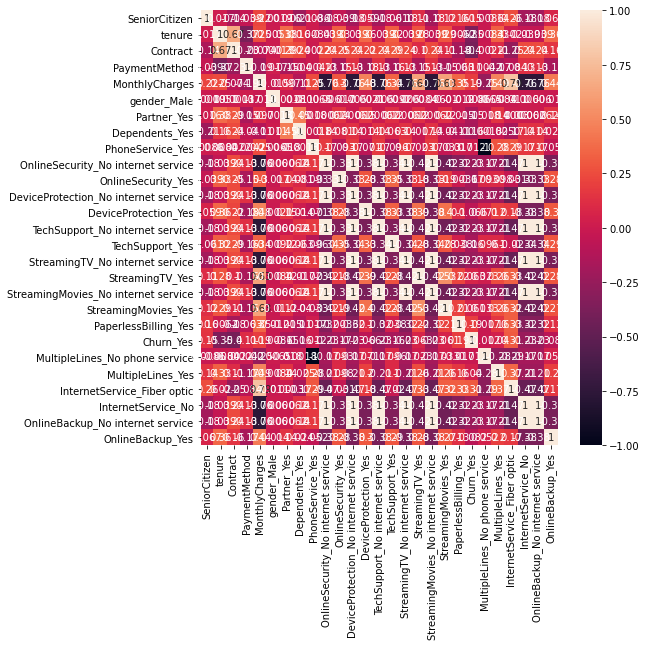

In [97]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [98]:
df.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,2,0.115423,29.85,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,34,1,3,0.385075,1889.5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,0.354229,108.15,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0,45,1,0,0.239303,1840.75,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,0,2,0.521891,151.65,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0


<AxesSubplot:xlabel='Churn_Yes', ylabel='Count'>

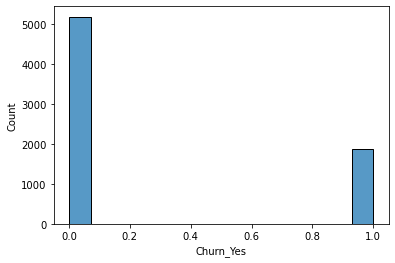

In [99]:
sns.histplot(df['Churn_Yes'])

<AxesSubplot:xlabel='gender_Male', ylabel='Count'>

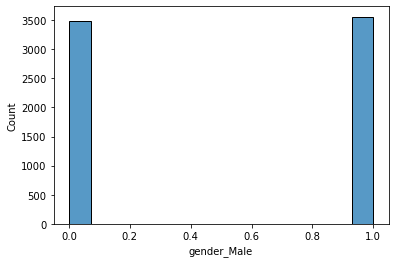

In [100]:
sns.histplot(df['gender_Male'])

C:\Users\Nitheesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

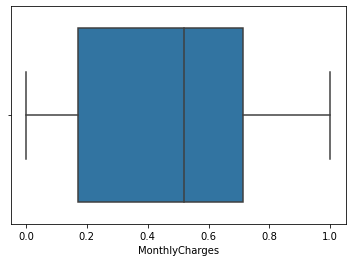

In [101]:
sns.boxplot(df['MonthlyCharges'])

C:\Users\Nitheesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

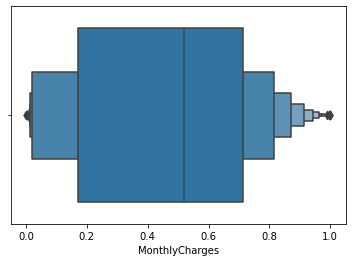

In [102]:
sns.boxenplot(df['MonthlyCharges'])

C:\Users\Nitheesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender_Male', ylabel='count'>

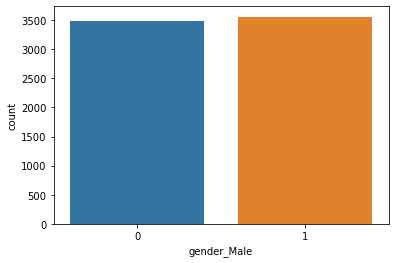

In [34]:
sns.countplot(df['gender_Male'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7043 non-null   object 
 1   SeniorCitizen                         7043 non-null   int64  
 2   tenure                                7043 non-null   int64  
 3   Contract                              7043 non-null   int32  
 4   PaymentMethod                         7043 non-null   int32  
 5   MonthlyCharges                        7043 non-null   float64
 6   TotalCharges                          7043 non-null   object 
 7   gender_Male                           7043 non-null   uint8  
 8   Partner_Yes                           7043 non-null   uint8  
 9   Dependents_Yes                        7043 non-null   uint8  
 10  PhoneService_Yes                      7043 non-null   uint8  
 11  OnlineSecurity_No

In [36]:
df.describe()

,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,0.690473,1.574329,0.462803,0.504756,0.483033,0.299588,0.903166,0.216669,...,0.216669,0.387903,0.592219,0.265370,0.096834,0.421837,0.439585,0.216669,0.216669,0.344881
std,0.368612,24.559481,0.833755,1.068104,0.299403,0.500013,0.499748,0.458110,0.295752,0.412004,...,0.412004,0.487307,0.491457,0.441561,0.295752,0.493888,0.496372,0.412004,0.412004,0.475363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,1.000000,0.171642,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,2.000000,0.518408,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,1.000000,2.000000,0.712438,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,72.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.head()

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,7590-VHVEG,0,1,0,2,0.115423,29.85,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,1,3,0.385075,1889.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,0,3,0.354229,108.15,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,1,0,0.239303,1840.75,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,0,2,0.521891,151.65,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
# sns.swarmplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

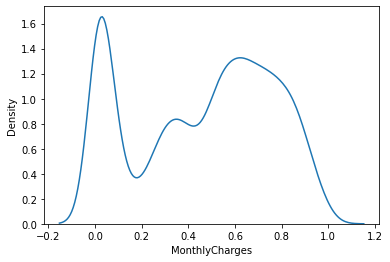

In [38]:
sns.kdeplot(df['MonthlyCharges'])

In [116]:
df.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,34,1,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0,45,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,0,2,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


<AxesSubplot:xlabel='Churn_Yes', ylabel='Count'>

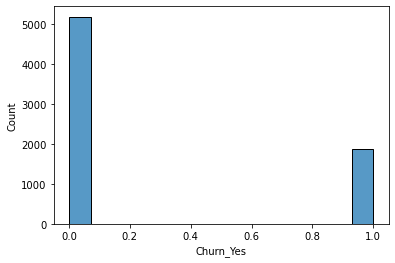

In [117]:
sns.histplot(df['Churn_Yes'])

In [103]:
df.drop('TotalCharges',inplace=True,axis=1)

In [104]:
df.drop('MonthlyCharges',inplace=True,axis=1)

In [119]:
df.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,34,1,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0,45,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,0,2,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


<AxesSubplot:xlabel='gender_Male', ylabel='Churn_Yes'>

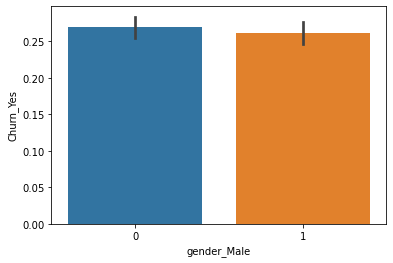

In [121]:
sns.barplot(data=df,x=df.gender_Male,y=df.Churn_Yes)

# features selection 

In [123]:
# Varience Threshold

In [124]:
df.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0,34,1,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0,45,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,0,2,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [125]:
x=df.drop('Churn_Yes',axis=1)

In [126]:
y=df.Churn_Yes

In [127]:
from sklearn.feature_selection import VarianceThreshold

In [128]:
var=VarianceThreshold(threshold=0)

In [129]:
var.fit_transform(x)

array([[ 0,  1,  0, ...,  0,  0,  1],
       [ 0, 34,  1, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  1],
       ...,
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 1,  4,  0, ...,  0,  0,  0],
       [ 0, 66,  2, ...,  0,  0,  0]], dtype=int64)

In [130]:
varience_threshold=x.columns[var.get_support()]

In [131]:
varience_threshold  # varience features

Index(['SeniorCitizen', 'tenure', 'Contract', 'PaymentMethod', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'],
      dtype='object')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   SeniorCitizen                         7043 non-null   int64
 1   tenure                                7043 non-null   int64
 2   Contract                              7043 non-null   int32
 3   PaymentMethod                         7043 non-null   int32
 4   gender_Male                           7043 non-null   uint8
 5   Partner_Yes                           7043 non-null   uint8
 6   Dependents_Yes                        7043 non-null   uint8
 7   PhoneService_Yes                      7043 non-null   uint8
 8   OnlineSecurity_No internet service    7043 non-null   uint8
 9   OnlineSecurity_Yes                    7043 non-null   uint8
 10  DeviceProtection_No internet service  7043 non-null   uint8
 11  DeviceProtection_Yes                  7043 

In [133]:
# chi2 

In [135]:
chi=SelectKBest(chi2,k=15)

In [136]:
chi.fit_transform(x,y)

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0, 34,  1, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 1,  4,  0, ...,  1,  0,  0],
       [ 0, 66,  2, ...,  1,  0,  0]], dtype=int64)

In [138]:
x.columns[chi.get_support()]

Index(['SeniorCitizen', 'tenure', 'Contract', 'Dependents_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'PaperlessBilling_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineBackup_No internet service'],
      dtype='object')

In [139]:
# RFe 

In [141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [142]:
model=LogisticRegression()

In [143]:
rfe=RFE(model,n_features_to_select=15)

In [145]:
rfe.fit_transform(x,y)

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [146]:
rfe_features=x.columns[rfe.get_support()]

In [147]:
rfe_features

Index(['Contract', 'Dependents_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'PaperlessBilling_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes'],
      dtype='object')

In [149]:
df1=df[rfe_features]

In [150]:
df1.head()

,Contract,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [151]:
df_churn=df['Churn_Yes']

In [152]:
df_churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8

In [155]:
df1=pd.concat([df,df_churn],axis=1)

In [156]:
df1

,SeniorCitizen,tenure,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Churn_Yes
0,0,1,0,2,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,34,1,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,3,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,1
3,0,45,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2,0,2,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,1,3,1,1,1,1,0,1,...,1,1,0,0,1,0,0,0,0,0
7039,0,72,1,1,0,1,1,1,0,0,...,1,1,0,0,1,1,0,0,1,0
7040,0,11,0,2,0,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
7041,1,4,0,3,1,1,0,1,0,0,...,0,1,1,0,1,1,0,0,0,1


In [157]:
df=df1

In [168]:
x=df.drop('Churn_Yes',axis=1)

In [169]:
y=df['Churn_Yes']

In [208]:
new=df[rfe_features]

In [210]:
new.head()

,Contract,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [211]:
df11=pd.concat([new,df_churn],axis=1)

In [212]:
df11

,Contract,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Churn_Yes
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0
7039,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0
7040,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7041,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1


In [213]:
df11.head()

,Contract,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Churn_Yes
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1


In [214]:
x=df11.drop('Churn_Yes',axis=1)

In [215]:
y=df11.Churn_Yes

In [216]:
x.shape

(7043, 15)

In [217]:
y.shape

(7043,)

In [243]:
print(x_train.shape)
print(x_test.shape)

(5282, 15)
(1761, 15)


In [244]:
print(y_train.shape)
print(y_test.shape)

(5282,)
(1761,)


# Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
model=LogisticRegression()

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=55)

In [227]:
model.fit(x_train,y_train)

LogisticRegression()

In [232]:
y_pred=model.predict(x_test)

In [234]:
model.score(x_test,y_test)

0.7864849517319704

In [240]:
from sklearn.metrics import confusion_matrix

In [241]:
cm=confusion_matrix(y_test,y_pred)

In [242]:
cm

array([[1116,  162],
       [ 214,  269]], dtype=int64)

<AxesSubplot:>

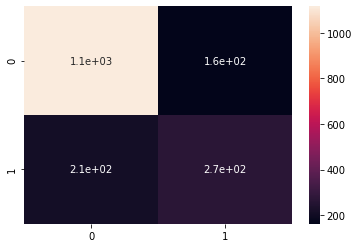

In [247]:
sns.heatmap(cm,annot=True)

In [256]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [259]:
precision=precision_score(y_test,y_pred)

In [260]:
precision

0.6077481840193705

In [261]:
accuracy=accuracy_score(y_test,y_pred)

In [263]:
accuracy

0.7762634866553095

In [264]:
recall=recall_score(y_test,y_pred)

In [265]:
recall

0.5196687370600414

In [266]:
f1=f1_score(y_test,y_pred)

In [267]:
f1

0.5602678571428571

# support vector machine 

In [197]:
from sklearn.svm import SVC

In [238]:
mode.fit(x_train,y_train)

SVC()

In [239]:
mode.score(x_test,y_test)

0.7762634866553095

In [251]:
y_pred=mode.predict(x_test)

In [252]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [253]:
cm=confusion_matrix(y_test,y_pred)

In [254]:
cm

array([[1116,  162],
       [ 232,  251]], dtype=int64)

<AxesSubplot:>

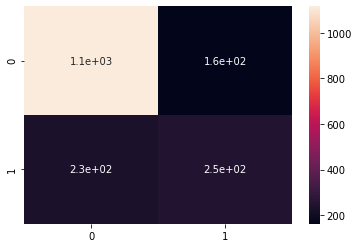

In [255]:
sns.heatmap(cm,annot=True)

In [268]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [269]:
accuracy=accuracy_score(y_test,y_pred)

In [270]:
accuracy

0.7762634866553095

In [271]:
recall=recall_score(y_test,y_pred)

In [272]:
recall

0.5196687370600414

In [273]:
precision_score=precision_score(y_test,y_pred)

In [274]:
precision_score

0.6077481840193705

In [275]:
f1=f1_score(y_test,y_pred)

In [276]:
f1

0.5602678571428571

In [277]:
from sklearn.model_selection import GridSearchCV

In [281]:
grid=GridSearchCV(x_train,y_train)

In [282]:
grid

GridSearchCV(estimator=      Contract  Dependents_Yes  PhoneService_Yes  \
486          0               0                 1   
3378         2               0                 1   
5520         1               0                 1   
3280         2               0                 1   
1432         0               0                 1   
...        ...             ...               ...   
6685         0               0                 1   
968          2               0                 1   
4391         0               0                 1   
4762         0               0                 1   
4557         1               0                 0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
486                                    0                   0   
3378                                   0                   1   
5520                                   0                   1   
3280                                   0                   1   
1432                                   1                   0   
...                                  ...                 ...   
6685                                   0                   0   
968                                    0                   1   
4391                                   0                   0   
4762                                   0                   0   
4557                                   0                   0   

      DeviceProtection_No internet service  TechSupport_No internet service  \
486                                      0                                0   
3378                                     0                                0   
5520                                     0                                0   
3280                                     0                                0   
143...
      PaperlessBilling_Yes  InternetService_Fiber optic  InternetService_No  \
486                      1                            1                   0   
3378                     0                            0                   0   
5520                     1                            1                   0   
3280                     0                            0                   0   
1432                     0                            0                   1   
...                    ...                          ...                 ...   
6685                     1                            0                   0   
968                      0                            0                   0   
4391                     1                            0                   0   
4762                     0                            1                   0   
4557                     0                            0                   0   

      OnlineBackup_No internet service  OnlineBackup_Yes  
486                                  0                 1  
3378                                 0                 1  
5520                                 0                 0  
3280                                 0                 1  
1432                                 1                 0  
...                                ...               ...  
6685                                 0                 0  
968                                  0                 1  
4391                                 0                 0  
4762                                 0                 0  
4557                                 0                 0  

[5282 rows x 15 columns],
             param_grid=486     0
3378    0
5520    0
3280    0
1432    0
       ..
6685    0
968     0
4391    0
4762    0
4557    0
Name: Churn_Yes, Length: 5282, dtype: uint8)

In [285]:
from sklearn.model_selection import RandomizedSearchCV

In [286]:
random=RandomizedSearchCV(x_train,y_train)

In [287]:
random

RandomizedSearchCV(estimator=      Contract  Dependents_Yes  PhoneService_Yes  \
486          0               0                 1   
3378         2               0                 1   
5520         1               0                 1   
3280         2               0                 1   
1432         0               0                 1   
...        ...             ...               ...   
6685         0               0                 1   
968          2               0                 1   
4391         0               0                 1   
4762         0               0                 1   
4557         1               0                 0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
486                                    0                   0   
3378                                   0                   1   
5520                                   0                   1   
3280                                   0                   1   
1432                                   1                   0   
...                                  ...                 ...   
6685                                   0                   0   
968                                    0                   1   
4391                                   0                   0   
4762                                   0                   0   
4557                                   0                   0   

      DeviceProtection_No internet service  TechSupport_No internet service  \
486                                      0                                0   
3378                                     0                                0   
5520                                     0                                0   
328...
      PaperlessBilling_Yes  InternetService_Fiber optic  InternetService_No  \
486                      1                            1                   0   
3378                     0                            0                   0   
5520                     1                            1                   0   
3280                     0                            0                   0   
1432                     0                            0                   1   
...                    ...                          ...                 ...   
6685                     1                            0                   0   
968                      0                            0                   0   
4391                     1                            0                   0   
4762                     0                            1                   0   
4557                     0                            0                   0   

      OnlineBackup_No internet service  OnlineBackup_Yes  
486                                  0                 1  
3378                                 0                 1  
5520                                 0                 0  
3280                                 0                 1  
1432                                 1                 0  
...                                ...               ...  
6685                                 0                 0  
968                                  0                 1  
4391                                 0                 0  
4762                                 0                 0  
4557                                 0                 0  

[5282 rows x 15 columns],
                   param_distributions=486     0
3378    0
5520    0
3280    0
1432    0
       ..
6685    0
968     0
4391    0
4762    0
4557    0
Name: Churn_Yes, Length: 5282, dtype: uint8)

# implement k means

In [294]:
from sklearn.cluster import KMeans

In [296]:
kmeans=KMeans()

In [ ]:
kmeans